In [9]:
# Подгрузка данных и импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Загрузка данных
url = 'https://raw.githubusercontent.com/PurunSA/my_projects/refs/heads/main/bank/churn.csv'
df = pd.read_csv(url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


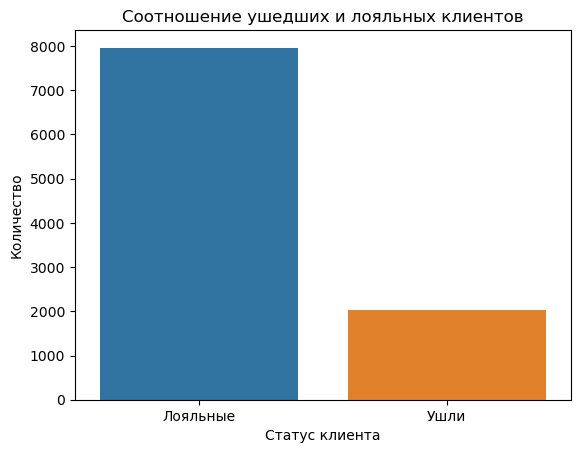

In [ ]:
# 9.1 Соотношение ушедших и лояльных клиентов

sns.countplot(data=df, x='Exited')
plt.title('Соотношение ушедших и лояльных клиентов')
plt.xticks([0, 1], ['Лояльные', 'Ушли'])
plt.xlabel('Статус клиента')
plt.ylabel('Количество')
plt.show()

# Большинство клиентов остаются, но доля оттока значительна — модель для прогнозирования оттока будет полезна

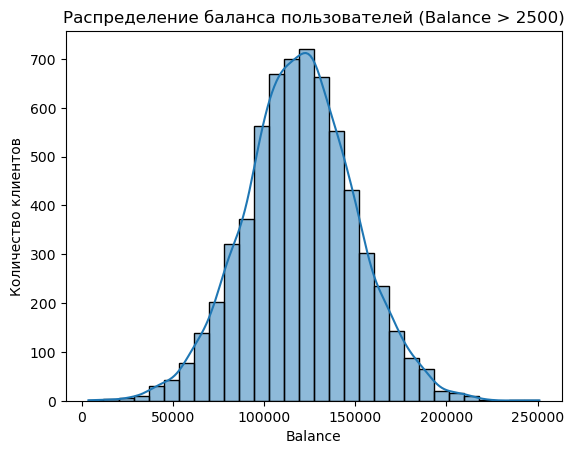

In [ ]:
# 9.2 Распределение баланса (Balance > 2500)

sns.histplot(df[df['Balance'] > 2500]['Balance'], bins=30, kde=True)
plt.title('Распределение баланса пользователей (Balance > 2500)')
plt.xlabel('Balance')
plt.ylabel('Количество клиентов')
plt.show()

# Баланс распределён неравномерно. Есть резкие пики, возможно, из-за типовых депозитов

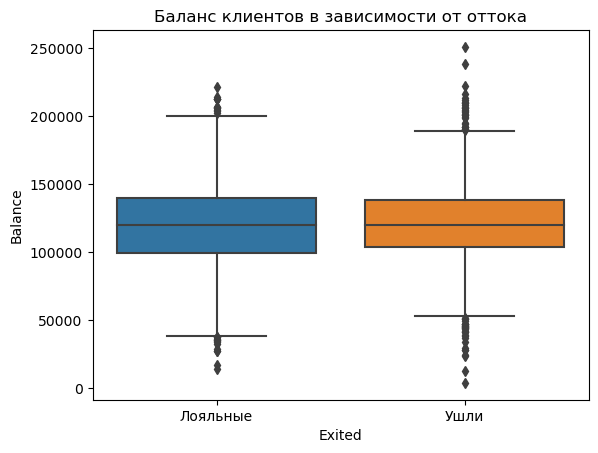

In [ ]:
# 9.3 Распределение баланса по оттоку

sns.boxplot(data=df[df['Balance'] > 0], x='Exited', y='Balance')
plt.title('Баланс клиентов в зависимости от оттока')
plt.xticks([0, 1], ['Лояльные', 'Ушли'])
plt.show()

# Ушедшие клиенты часто имеют более высокий баланс, что может указывать на неудовлетворённость качеством обслуживания при наличии крупных средств

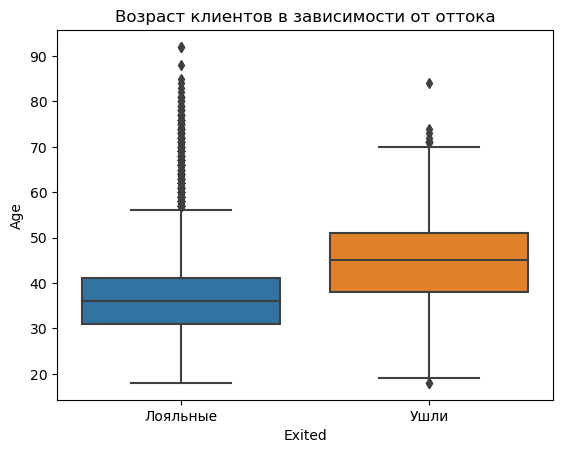

In [13]:
# 9.4 Возраст и отток

sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Возраст клиентов в зависимости от оттока')
plt.xticks([0, 1], ['Лояльные', 'Ушли'])
plt.show()

# Средний возраст ушедших выше. Банк должен сфокусироваться на клиентах 40–60 лет

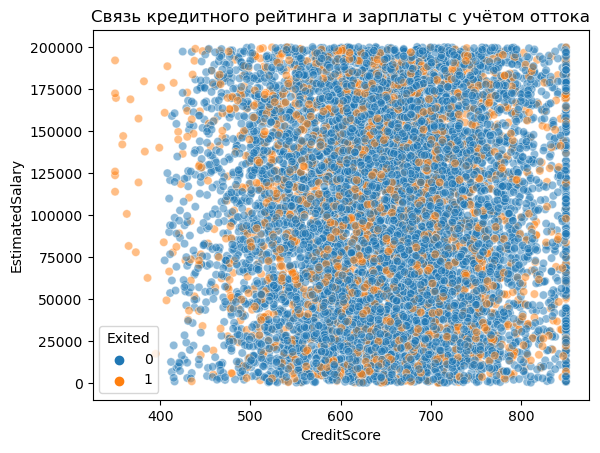

In [14]:
# 9.5 CreditScore vs EstimatedSalary (цвет — отток)

sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary', hue='Exited', alpha=0.5)
plt.title('Связь кредитного рейтинга и зарплаты с учётом оттока')
plt.show()

# Чёткой зависимости не видно — как среди платёжеспособных, так и среди клиентов с низким рейтингом есть отток

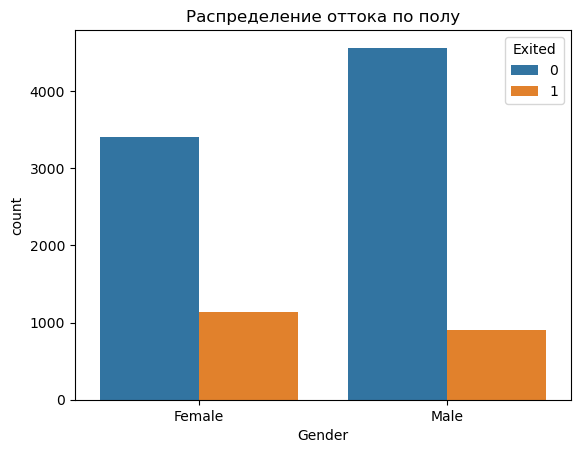

In [15]:
# 9.6 Пол и отток

sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Распределение оттока по полу')
plt.show()

# Мужчины чаще уходят. Возможно, они менее терпимы к неудобствам

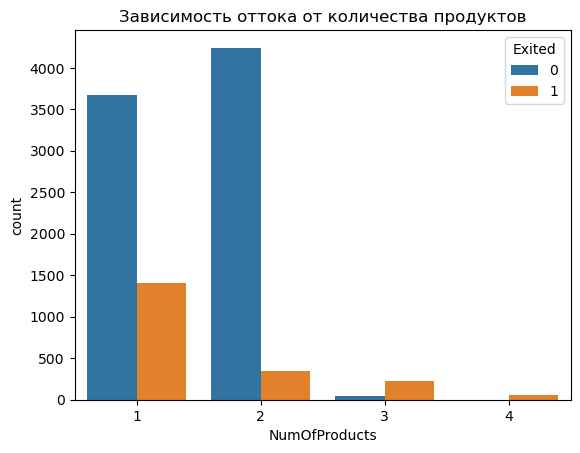

In [16]:
# 9.7 Отток и число продуктов

sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Зависимость оттока от количества продуктов')
plt.show()

# Клиенты с 1 продуктом наиболее подвержены оттоку. Банк должен стимулировать кросс-продажи

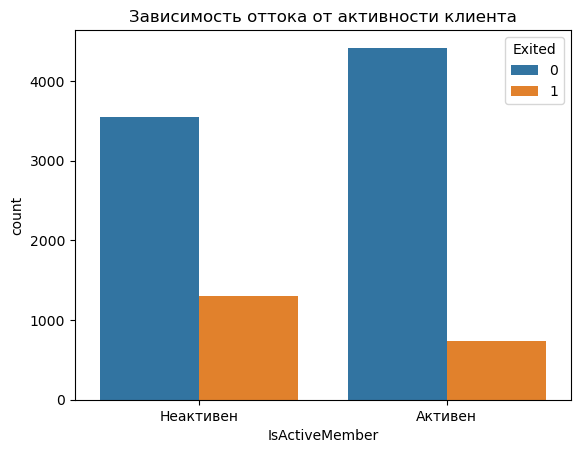

In [17]:
# 9.8 Активность и отток

sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Зависимость оттока от активности клиента')
plt.xticks([0, 1], ['Неактивен', 'Активен'])
plt.show()

# Неактивные пользователи чаще уходят. Рекомендуется активировать их через уведомления, предложения и поддержку

In [18]:
# 9.9 География и отток

country_df = df.groupby('Geography')['Exited'].mean().reset_index()
country_df.columns = ['country', 'exit_rate']

fig = px.choropleth(country_df, locations='country', locationmode='country names',
                    color='exit_rate', title='Доля ушедших клиентов по странам',
                    color_continuous_scale='Reds')
fig.show()

# Уровень оттока выше в Германии. Вероятно, из-за конкуренции или других ожиданий от услуг

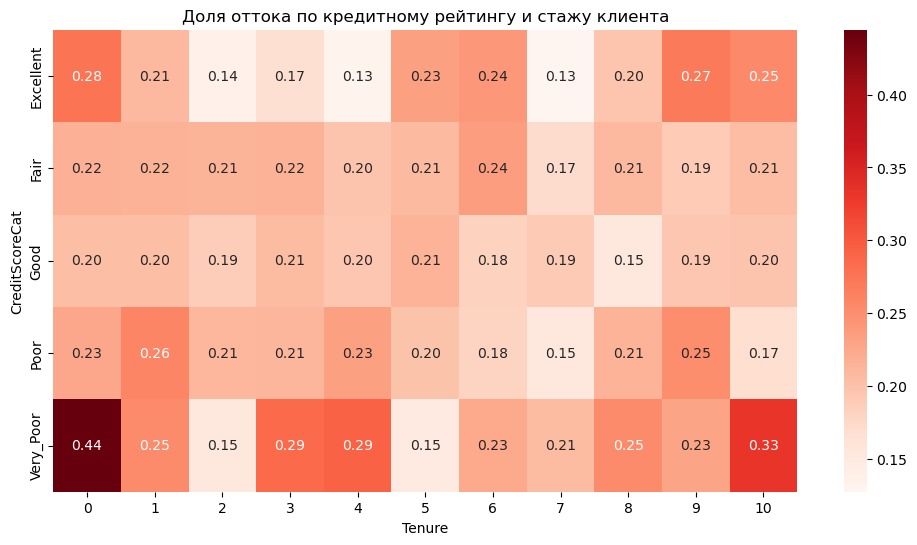

In [19]:
# 9.10 Категории рейтинга и тепловая карта

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)

pivot = df.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt='.2f')
plt.title('Доля оттока по кредитному рейтингу и стажу клиента')
plt.show()

# Наиболее уязвимы к уходу клиенты с низким рейтингом и стажем до 3 лет. Это ключевая группа для удержания